### Loops & Dictionaries 

You are goin to create a nested dictionary of recipes, with keys at the top level and dictionaries as their associated values. 

1. First, create an empty dictionary.
2. Add three dishes as the top keys of your dictionary (e.g. 'meat pie')
3. For each key, add its paired value. The value should be another dictionary consisting of ingredient:amount pairs. (eg 'sugar': 'two cups') Each dish should have three ingredients.
4. Write a function to process the recipe dictionary. This function should loop through the recipes and return a *list* of ingredients for each recipe.

In [5]:
recipe_dict = {}

chili = {'chili':{'meat':'1 pound', 'beans':'1 can', 'diced tomatoes':'1 can'}}
meat_pie = {'meat pie':{'meat':'1 animal', 'pie crust':'1 crust', 'cheese':'1 cup'}}
grilled_cheese = {'grilled cheese':{'bread':'2 slices', 'cheese':'2 slices', 'butter':'a lot'}}

for recipes in [chili, meat_pie, grilled_cheese]:
    recipe_dict.update(recipes)
    

{'chili': {'meat': '1 pound', 'beans': '1 can', 'diced tomatoes': '1 can'},
 'meat pie': {'meat': '1 animal', 'pie crust': '1 crust', 'cheese': '1 cup'},
 'grilled cheese': {'bread': '2 slices',
  'cheese': '2 slices',
  'butter': 'a lot'}}

In [8]:
def parse_recipe_dict(recipe_dict):
    list_of_lists = []
    for k,v in recipe_dict.items():
        list_of_lists.append(list(v.keys()))
    return list_of_lists

In [9]:
parse_recipe_dict(recipe_dict)

[['meat', 'beans', 'diced tomatoes'],
 ['meat', 'pie crust', 'cheese'],
 ['bread', 'cheese', 'butter']]

### Coding readibility 

1. Rewrite the code below in a 'best practice way'

In [10]:
def blabla():
    for i in range(10):
            for j in range(10):
                    for k in range(10): 
                        print(i,j,k) 
    return everything

In [14]:
## Add comments here

### Data cleaning 

1. read data from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package 
2. Add a month column and a year column
3. print out the name of the columns where there are missing values 
4. Write a function if_no_rainToday_zero_rainfall to fill in the missing values in no rain today column according to zero rainfall column
5. fill in the other float columns with their median
6. Create a dummy variable from month column

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv("../data/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [79]:
df.Date = df.Date.astype('datetime64')
df.Date.dtype

dtype('<M8[ns]')

In [80]:
df['Month'] = df.Date.apply(lambda x: x.month)
df['Year'] = df.Date.apply(lambda x: x.year)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,12,2008


In [81]:
missing = df.shape[0] - df.count()
print(missing[missing>0])

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64


In [91]:
def if_no_rainToday_zero_rainfall(df_in):
    df_in.Rainfall.fillna(0, inplace=True)
    df_in.loc[df.Rainfall>0, "RainToday"].fillna('Yes', inplace=True)
    df_in.RainToday.fillna(0, inplace=True)
    

In [92]:
if_no_rainToday_zero_rainfall(df)

In [109]:
print(len(df[df.RainToday.isna()]))
print(len(df[df.Rainfall.isna()]))

0
0


In [94]:
missing = df.shape[0] - df.count()
print(missing[missing>0])

MinTemp            637
MaxTemp            322
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64


In [99]:
for col_name in df.columns:
    if df[col_name].dtype == 'float64':
        df[col_name].fillna(df[col_name].median(), inplace=True)

In [100]:
missing = df.shape[0] - df.count()
print(missing[missing>0])

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
dtype: int64


In [105]:
df = pd.concat([df, pd.get_dummies(df.Month, prefix="Month")], axis = 1)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 38 columns):
Date             142193 non-null datetime64[ns]
Location         142193 non-null object
MinTemp          142193 non-null float64
MaxTemp          142193 non-null float64
Rainfall         142193 non-null float64
Evaporation      142193 non-null float64
Sunshine         142193 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    142193 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     142193 non-null float64
WindSpeed3pm     142193 non-null float64
Humidity9am      142193 non-null float64
Humidity3pm      142193 non-null float64
Pressure9am      142193 non-null float64
Pressure3pm      142193 non-null float64
Cloud9am         142193 non-null float64
Cloud3pm         142193 non-null float64
Temp9am          142193 non-null float64
Temp3pm          142193 non-null float64
RainToday        142193 n

### Linear regression 

1. What are the assumptions of linear regression? 

1. Linearity
2. Normal distribution of residuals
3. Homoscedasticity


2. Explain the reasoning for each assumption

1.  If the relationship is not linear, then linear regression probably isn't the best fit.
2.  A normal distribution of residuals is indicative of the y^hat being a good predictor, as the likelihood of an error decreases as the amount of that error increases.
3.  Homoscedasticity means that the distribution of error does not change as the X variables change.  If the model produced larger errors for larger values of X, then a differnet model would be more appropriate so that predicted y has the same relevance, regardless of where you are on the X axis.

3. Explain the concept of correlation. What is the covariance? Why don't we use covariance? 

Correlation is the percentage of variation in the Y variable that can be explained by the variation in the X variable.

Covariance is the variation in both variables together relative to the variation of one times the variation of the other.

We use correlation because it is standardized to be between -1 and 1.  Whereas, covariance scales relative to the magnitude of the variables themself.

4. Should we use the correlation to decide on variables to delete from our model?

Not exactly.  A strong (1 or -1) correlation is indicative that a variable should be included.  But a variable may be weakly correlated with the Y variable, but still be helpful in the overall model to stratify data and thereby strengthen the predicitions produced from the other variables that do have strong correlation.

5. What is R squared? How can it help us in comparing among models? 
What is the R squared of the baseline model?

R^2 is the percentage of the variaton in Y that can be explained by the variation in all the X variables.

A higher R^2 implies a stronger model.

R^2 of the baseline model is where we have no X variables and use the average of Y.  Therefore, the R^2 will equal 0.

6. Explain cross-validation. Why do we use it?   
[stretch] Create a function that does cross validation? (use sklearn, numpy etc.)

Cross-validation is testing the model against data that was not used to train the model.

We use it to test the robustness of the model.  If a model is only good at predicting values in a known dataset that was used to make the model, it doesn't really have any useful application (since all it does is predict values that are already known.)

7. How can we evaluate our model besides R squared? and why would we want to? (hint: loss function)

Another evaluation of the model is mean square error, which tells the average difference in predicted and actual Y values (squared).  This gives us a measure of how far off the model is in it's predictions and can be standardized against the average Y value to get a percentage of average error (after taking sqrt).

8. Using the X, Y variables created in the plotting section use the various packages 
to run a linear regression model

In [123]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [124]:
X = sm.add_constant(X)

model_init = sm.OLS(Y, X).fit()
model_init.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2607.
Date:                Thu, 16 May 2019   Prob (F-statistic):           2.03e-72
Time:                        10:47:50   Log-Likelihood:                -354.19
No. Observations:                 100   AIC:                             712.4
Df Residuals:                      98   BIC:                             717.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1310      1.596      8.855      0.000      10.964      17.298
x1             1.4984      0.029     51.059      0.000       1.440       1.557
==============================================================================
Omnibus:                       12.455   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.695
Skew:                           0.233   Prob(JB):                       0.0956
Kurtosis:                       2.046   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

9. Write down the equation of the resulting model

### Plotting 

1. Use numpy random normal to create 100 points for an X variable 
2. Use numpy random normal to create 100 points for a Y Variable
2. Plot it as a scatter plot and as a histogram 
3. Place the plots side by side 
4. change the figure size to 12x15


In [111]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [115]:
X = np.random.random(100)*100
Y = 1.5 * X + np.random.random(100)*30

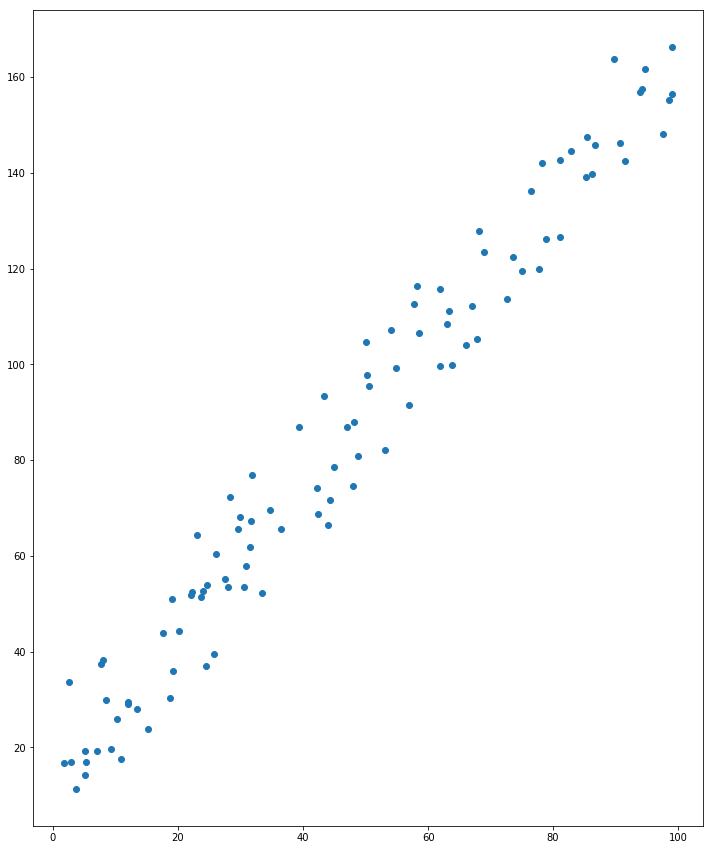

In [120]:
fig = plt.figure(figsize=(12,15))

plt.scatter(X, Y);

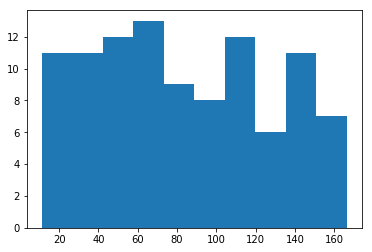

In [122]:
plt.hist(Y);

# Done